In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [14]:
#train data
df_train=pd.read_csv("training_data.csv")
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [15]:
#test data
df_test=pd.read_csv("test_data.csv",names=["text"])
df_test

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...
5,Indonesia's volcano eruption leaves 22 dead
6,"Adverts for Air France, Lufthansa and Etihad h..."
7,Maori MP performs haka before swearing oath to...
8,Philippines earthquake: Video shows chaos in s...
9,Wakeskater plunges off Dubai skyscraper pool i...


In [16]:
df_train["label"].unique()

array([2, 3, 1, 0])

In [17]:
df_train["label"].value_counts()

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [18]:
# map the categories(label data)
category_mapping={0:"world",1:"sports",2:"Business",3:"sci/tech"}
df_train["label_map"]=df_train["label"].map(category_mapping)

In [19]:
df_train

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,world
119996,Renteria signing a top-shelf deal Red Sox gene...,1,sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,sports


In [20]:
df_train["label_map"].value_counts()

label_map
Business    30000
sci/tech    30000
sports      30000
world       30000
Name: count, dtype: int64

In [21]:
# drop duplicates
unique_new=df_train.drop_duplicates(subset=["label_map"])
unique_new

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
78,"'Madden,' 'ESPN' Football Score in Different W...",3,sci/tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,world


In [22]:
# label text mapping like loop
for _,row in unique_new.iterrows(): # here _ means dont repeat this process again in back so used _
    print(f"Topic:,{row['label_map']}") # itter rows means repeat
    print(f"News:,{row['text']}")
    print("-"*70)

Topic:,Business
News:,Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
----------------------------------------------------------------------
Topic:,sci/tech
News:,'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because "Madden NFL 2005" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it.
----------------------------------------------------------------------
Topic:,sports
News:,Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were fas

In [23]:
df_train["label_map"].unique()

array(['Business', 'sci/tech', 'sports', 'world'], dtype=object)

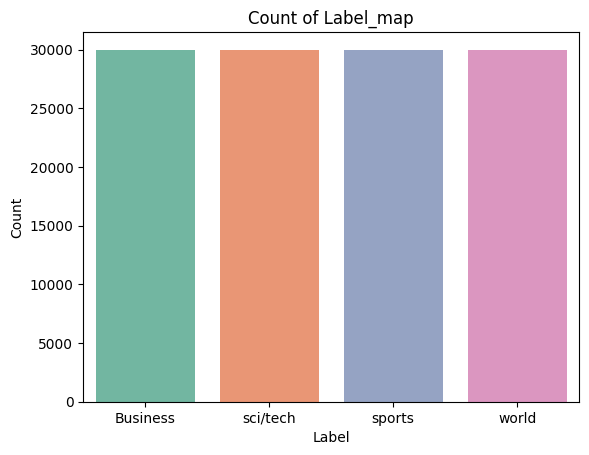

In [24]:
# Count plot for the 'label_map' column
sns.countplot(x='label_map', data=df_train, palette="Set2")

# Add labels and title
plt.title('Count of Label_map')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

In [25]:
! pip install wordcloud

In [26]:
# word cloud
from wordcloud import WordCloud

In [27]:
my_text=" ".join(df_train["text"].astype(str))

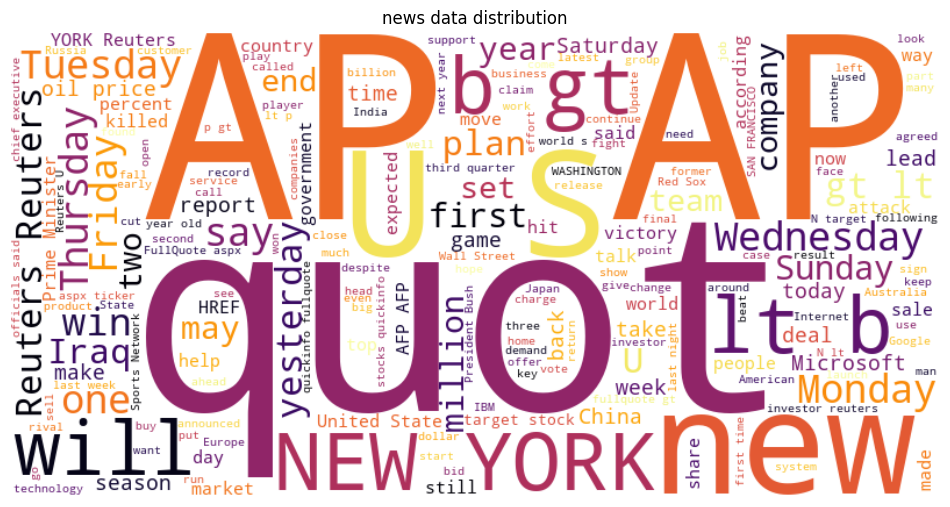

In [28]:
wordcloud=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="inferno",
    stopwords=None
).generate(my_text)
plt.figure(figsize=(12,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("news data distribution")
plt.show()

## use this for text data cleaning for any file save this

In [29]:
import re,string
def data_cleaning(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text=re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [30]:
df_train.head()

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


In [31]:
df_train["text"]=df_train["text"].apply(data_cleaning)
df_train.head()

,text,label,label_map
0,wall st bears claw back into the black reuters...,2,Business
1,carlyle looks toward commercial aerospace reut...,2,Business
2,oil and economy cloud stocks outlook reuters r...,2,Business
3,iraq halts oil exports from main southern pipe...,2,Business
4,oil prices soar to alltime record posing new m...,2,Business


In [32]:
# stop words,lemmentization,vectorization

# Tokenization

In [33]:
# You run pip install nltk to install the NLTK library — it stands for Natural Language Toolkit.
# nltk is a Python library for Natural Language Processing (NLP) — it helps you work with human language text.



In [34]:
# Tokenization--->Split text into words or sentences-->word_tokenize()



In [35]:
! pip install nltk

In [36]:
import nltk

In [37]:
nltk.download('punkt') # download the tokenizer data (run this only once)
nltk.download('punkt_tab') # sometimes needed in newer NLTK versions
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LOKESHRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LOKESHRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOKESHRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LOKESHRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
from nltk import word_tokenize

In [39]:
df_train["text"]=df_train["text"].apply(word_tokenize)
df_train.head()


,text,label,label_map
0,"[wall, st, bears, claw, back, into, the, black...",2,Business
1,"[carlyle, looks, toward, commercial, aerospace...",2,Business
2,"[oil, and, economy, cloud, stocks, outlook, re...",2,Business
3,"[iraq, halts, oil, exports, from, main, southe...",2,Business
4,"[oil, prices, soar, to, alltime, record, posin...",2,Business


# Stopwords
### eg: the,is, in, at ,on

In [40]:
# Stopword Removal-->Remove words like “the”, “is”, “and” -->nltk.corpus.stopwords.

In [41]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESHRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
def stop_words(text):
    stop_words=set(stopwords.words("english"))# set means no duplicates that mean repeated words
    text=[words for words in text if words not in stop_words] # above set have already words contained but in otherwise no words in word text this line take to consider and return that word
    return text

In [43]:
df_train["text"]=df_train["text"].apply(stop_words)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Business
1,"[carlyle, looks, toward, commercial, aerospace...",2,Business
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Business
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Business
4,"[oil, prices, soar, alltime, record, posing, n...",2,Business


# Lemmatization

In [44]:
# Better word normalization using grammar-->WordNetLemmatizer()
# eg:run,ran,running-->run
# eg:change,changes,changed,changing--->change
# Stemming-->Convert words to their root form (e.g., "running" → "run")-->PorterStemmer()


In [45]:
#nltk.download('wordnet')
#nltk.download('omw-1.4') # optional but recommended (WordNet data translations)

# You’re getting that message because NLTK needs to download the WordNet dataset, which is used for lemmatization (and some other NLP tasks).

In [46]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemma_stem=WordNetLemmatizer()
    text=" ".join(lemma_stem.lemmatize(words) for words in text)
    return text


In [47]:
df_train["text"]=df_train["text"].apply(lemma)
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Business
1,carlyle look toward commercial aerospace reute...,2,Business
2,oil economy cloud stock outlook reuters reuter...,2,Business
3,iraq halt oil export main southern pipeline re...,2,Business
4,oil price soar alltime record posing new menac...,2,Business


# split x,y data

In [48]:
x=df_train["text"]
y=df_train["label"]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [51]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (90000,)
x_test: (30000,)


# Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
x_tfidf_train=tfidf.fit_transform(x_train)
x_tfidf_test=tfidf.transform(x_test)


In [53]:
x_tfidf_train.shape

(90000, 71884)

In [62]:
x_tfidf_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1909724 stored elements and shape (90000, 71884)>

In [63]:
# 90000 rows → you have 90,000 training samples (texts).
# 71884 columns → you have 71,884 unique features (words or tokens) extracted by the TF-IDF vectorizer.

## model building
### random forest,naviebayes,xgboost,lstm

#### Randomforestclassifier

In [64]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100 for more text
rf_model.fit(x_tfidf_train,y_train)
y_pred_rf=rf_model.predict(x_tfidf_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("classification_report:\n",classification_report(y_test,y_pred_rf))


Accuracy: 0.8915333333333333
Confusion_matrix:
 [[6659  290  326  197]
 [  95 7351   60   54]
 [ 276  113 6371  680]
 [ 312  171  680 6365]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7472
           1       0.93      0.97      0.95      7560
           2       0.86      0.86      0.86      7440
           3       0.87      0.85      0.86      7528

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



In [57]:
# in ml model estimators value of randomforest take too long time to take for run this one a main drawback

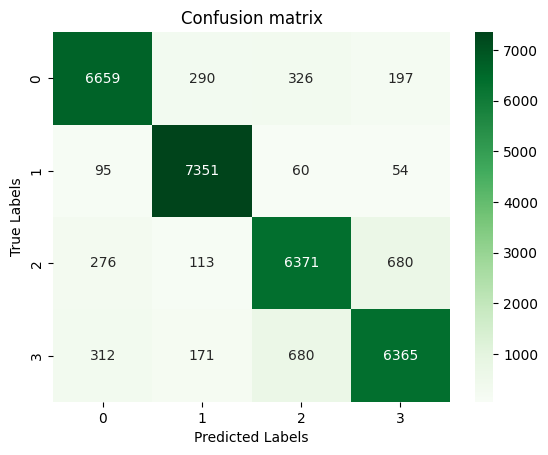

In [66]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") # format(fmt)--> "d"means integer(decimal format) It tells Seaborn to show whole numbers (like 23, 145, 0) instead of floats
# fmt='.2f' → format as float with 2 decimals, fmt='g' → general format (default)
plt.title("Confusion matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Model save

In [67]:
#import pickle
# store model
#with open("RandomForestClassifier.pkl","wb") as files:
 #   pickle.dump(rf_model,files)

In [68]:
# Store vectorization
#with open("tfidf_vector.pkl","wb") as vector_files:
 ##   pickle.dump(tfidf,vector_files)

# new prediction

In [69]:
# new data prediction
#with open("RandomForestClassifier.pkl","rb") as files:
  #  rf_model=pickle.load(files)

In [70]:
#with open("tfidf_vector.pkl","rb") as vector_files:
 #   tfidf=pickle.load(vector_files)

In [71]:
#new_text=["Apple launches new iphone with AI features"]

#new_text_tfidf=tfidf.transform(new_text)
#prediction=rf_model.predict(new_text_tfidf)
#if prediction[0]==0:
#    print("This is world news")
#elif prediction[0]==1:
 #   print("This is sports news")
#elif prediction[0]==2:
 #   print("This is Bussiness news")
#else:
 #   print("This is sci/tech news")

In [72]:
# 5 models
# best model selection
# hyper parameter tuning
# test.csv find label
# model and vector saving
# 4 texts new data prediction
# streamlit
 

# naive bayes

In [73]:
# try 2 to 3 lstm spare categorical softmax cross entropy

In [74]:
# if use ann rnn softmax give

In [75]:
# naives compared to other classification get accurate because get all important features

In [76]:
from sklearn.naive_bayes import MultinomialNB

nb_model=MultinomialNB()
nb_model.fit(x_tfidf_train,y_train)
y_pred_nb=nb_model.predict(x_tfidf_test)

In [77]:
print("accuracy_score",np.round(accuracy_score(y_test,y_pred_nb),2))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("Classification Report:\n",classification_report(y_test,y_pred_nb))

accuracy_score 0.9
Confusion matrix:
 [[6689  275  353  155]
 [  83 7402   44   31]
 [ 240   73 6529  598]
 [ 301   63  638 6526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7472
           1       0.95      0.98      0.96      7560
           2       0.86      0.88      0.87      7440
           3       0.89      0.87      0.88      7528

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



# Xgboost

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb_model=XGBClassifier(n_estimators=300,max_depth=5,random_state=42,n_jobs=-1)
xgb_model.fit(x_tfidf_train,y_train)
y_pred_xgb=xgb_model.predict(x_tfidf_test)


In [80]:
print("accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("Classification Report:\n",classification_report(y_test,y_pred_xgb))

accuracy_score: 0.9062333333333333
Confusion matrix:
 [[6737  251  282  202]
 [ 102 7323   59   76]
 [ 222   74 6557  587]
 [ 243  130  585 6570]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7472
           1       0.94      0.97      0.95      7560
           2       0.88      0.88      0.88      7440
           3       0.88      0.87      0.88      7528

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



# LSTM

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [82]:
text = df_train['text'].astype(str)
labels = df_train['label']


In [83]:
vocab_size = 5000  
max_length = 10   

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [84]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [86]:
lstm_model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation="softmax")  # use 'sigmoid' for binary
])


In [87]:
lstm_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [88]:
history = lstm_model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8331 - loss: 0.4738 - val_accuracy: 0.8743 - val_loss: 0.3690
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.8825 - loss: 0.3452 - val_accuracy: 0.8767 - val_loss: 0.3558
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.8923 - loss: 0.3074 - val_accuracy: 0.8714 - val_loss: 0.3721
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9014 - loss: 0.2739 - val_accuracy: 0.8737 - val_loss: 0.3694
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9107 - loss: 0.2440 - val_accuracy: 0.8726 - val_loss: 0.3780


In [89]:
loss, acc = lstm_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8710 - loss: 0.3896
Test Accuracy: 0.8710


In [90]:
#RandomForestClassifier Accuracy= 0.89
#NaiveBayes Accuracy=0.9049
#XgBoost Accuracy=0.9062
#Simple RNN Accuracy=0.9085
#LSTM Accuracy=0.9097

In [91]:
x=df_train["text"]
y=df_train["label"]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [93]:
x_train.shape

(96000,)

In [94]:
y_train

53541     0
41728     1
74819     1
106459    3
63062     2
         ..
110268    3
119879    3
103694    1
860       3
15795     3
Name: label, Length: 96000, dtype: int64

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Hyperparameter Tuning

In [97]:
param_grid = {
    'tfidf__max_df': [0.75, 1.0],             # ignore words that appear in >x% of docs
    'tfidf__min_df': [1, 2, 3],               # ignore rare words
    'tfidf__ngram_range': [(1,1), (1,2)],     # unigrams vs bigrams
    'tfidf__stop_words': [None, 'english'],
    'nb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]   # smoothing parameter
}


In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"{'nb__alpha': [0.1, 0.5, ...], 'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 2, ...], 'tfidf__ngram_range': [(1, ...), (1, ...)], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [100]:
print("Best Parameters:\n", grid.best_params_)
print("\nBest CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_


Best Parameters:
 {'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}

Best CV Accuracy: 0.9168854166666666


In [101]:
y_pred = best_model.predict(x_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9165833333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      5956
           1       0.95      0.99      0.97      6058
           2       0.88      0.89      0.88      5911
           3       0.90      0.89      0.90      6075

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000



# Model Save

In [103]:
import pickle 


In [104]:
#save model
with open("Bestmodel.pkl","wb") as files:
    pickle.dump(xgb_model,files)

In [105]:
with open("tfidf_vector.pkl","wb") as vector_files:
    pickle.dump(tfidf,vector_files)

In [106]:
with open("Bestmodel.pkl","rb") as files:
     model = pickle.load(files)

In [107]:
with open("tfidf_vector.pkl","rb") as vector_files:
    vector = pickle.load(vector_files)

# New Data Prediction

In [108]:
texts_train = ["Apple launches new product", "Team wins world cup", "Stock market rises", "NASA discovers new planet"]
labels_train = [3, 1, 2, 0]  # 0-world, 1-sports, 2-business, 3-sci/tech

In [109]:
pipeline.fit(texts_train, labels_train)

,steps,"[('tfidf', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [110]:
with open("news_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

# Load back
with open("news_pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [111]:
texts = ["Stock market rises.",
        "Indian women Teams win World Cup",
        "Car prices down across the board The cost of buying both new and second hand cars fell sharply over the past five years, a new survey has found",
        "Apple launches new iPhone with advanced features"
]

predictions = pipeline.predict(texts)

for txt, p in zip(texts, predictions):
    if p == 0:
        label = "It is world news"
    elif p == 1:
        label = "It is sports news"
    elif p == 2:
        label = "It is business news"
    else:
        label = "It is science and technology news"

    print(f"Text: {txt}")
    print(f"Prediction: {label}")
    print("-" * 50)

Text: Stock market rises.
Prediction: It is business news
--------------------------------------------------
Text: Indian women Teams win World Cup
Prediction: It is sports news
--------------------------------------------------
Text: Car prices down across the board The cost of buying both new and second hand cars fell sharply over the past five years, a new survey has found
Prediction: It is world news
--------------------------------------------------
Text: Apple launches new iPhone with advanced features
Prediction: It is science and technology news
--------------------------------------------------


# Test Data Prediction

In [112]:
test_data = vector.transform(df_test["text"])
pred = model.predict(test_data)

In [113]:
df_test["label"] = pred
df_test.head()

,text,label
0,Three quarters of financial firms still conduc...,2
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2
3,Why food discount stickers may be a thing of t...,2
4,German cabinet tries to solve ‘no-debt’ crisis...,2


In [114]:
# save model in csv
df_test.to_csv("test_data_prediction.csv",index=False)